In [110]:
from metaflow import Flow, metadata, get_metadata

In [111]:
metadata("../collect")

'local@../collect'

In [112]:
run = Flow("DownloadData").latest_successful_run

In [113]:
institutes = [i['name'] for i in run.data.sites]

In [114]:
process_run = Flow("ProcessData").latest_successful_run

In [115]:
sites = process_run.data.parsed_sites

In [116]:
import pandas

In [117]:
dfs = {key: pandas.DataFrame(sites[key]) for key in sites}

In [118]:
dfs.keys()

dict_keys(['Allensbach', 'Emnid', 'Forsa', 'Forsch’gr.Wahlen', 'GMS', 'Infratestdimap', 'INSA', 'Yougov'])

In [119]:
parties = dfs['Yougov'].columns[1:-2]

In [120]:
parties

Index(['CDU/CSU', 'SPD', 'GRÜNE', 'FDP', 'LINKE', 'AfD', 'Sonstige'], dtype='object')

In [121]:
party = parties[0]

In [122]:
for i in dfs:
    dfs[i]['Date'] = pandas.to_datetime(dfs[i]['Date'])

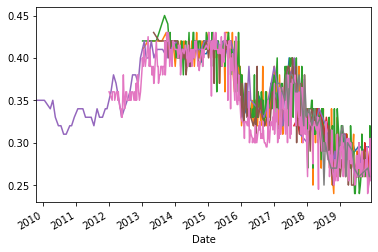

In [124]:
for i in dfs:
    try:
        dfs[i].set_index('Date')[party].plot.line()
    except:
        print(i)
        pass